<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/Celinka_E_0706022210042_Week6_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd #import data dari csv/excel dll
import numpy as np #import linear algebra, manipulasi array
import matplotlib.pyplot as plt #menampilkan visualisasi data
import seaborn as sns #menampilkan visualisasi statistik dri data
from sklearn.preprocessing import LabelEncoder #mengubah label kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #membagi dataset menjadi data pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #membuat model pohon keputusan
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluasi model
from sklearn import tree #visualisasi pohon keputusan
from sklearn.naive_bayes import GaussianNB #membuat model Naive Bayes

In [ ]:
#1
dataset = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/breast-cancer.csv')
dataset.sample(10)#menampikan 10 random data dari dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
350,899187,B,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
188,874662,B,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576
265,88995002,M,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,...,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
297,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
496,914366,B,12.650,18.17,82.69,485.6,0.10760,0.13340,0.080170,0.050740,...,14.38,22.15,95.29,633.7,0.15330,0.38420,0.35820,0.14070,0.3230,0.10330
306,89344,B,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,14.41,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
353,9010018,M,15.080,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,...,18.51,33.22,121.20,1050.0,0.16600,0.23560,0.40290,0.15260,0.2654,0.09438
66,859464,B,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.015040,...,10.41,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
153,87106,B,11.150,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,...,11.99,16.30,76.25,440.8,0.13410,0.08971,0.07116,0.05506,0.2859,0.06772
139,868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,...,11.92,15.77,76.53,434.0,0.13670,0.18220,0.08669,0.08611,0.2102,0.06784


In [ ]:
#2
dataset.info()
# menampilkan ringkasan struktur dataset tentang jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori dari DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#3
dataset.describe()
#menghasilkan statistik deskriptif dari kolom numerik dalam DataFrame. Untuk memahami distribusi dan variasi data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#4 Daftar kolom yang akan dihitung frekuensinya
columns = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
    "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
    "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

#mengubah kolom concave points_mean yg memiliki spasi menjadi concave_points_mean
dataset.columns = dataset.columns.str.replace(" ", "_")

# Loop untuk menghitung dan menampilkan frekuensi setiap kolom
for col in columns:
    print(f"Value counts for {col}:")
    print(dataset[col].value_counts())
    print("\n")

#menghitung frekuensi kemunculan nilai unik di kolom species, island, dan sex dalam dataset, termasuk nilai kosong jika ada (dropna=False)

Value counts for id:
id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64


Value counts for diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64


Value counts for radius_mean:
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64


Value counts for texture_mean:
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64


Value counts for perimeter_mean:
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64


Value counts for area_mean:
area_mean
512.2     3
1075.0    2
582.7     2
399

In [ ]:
#5
dataset.isnull().sum()
#dropna() digunakan untuk menghapus baris atau kolom yang mengandung nilai kosong (NaN).
#isnull() untuk memeriksa apakah ada nilai yang kosong (null atau NaN) di dalam dataset

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


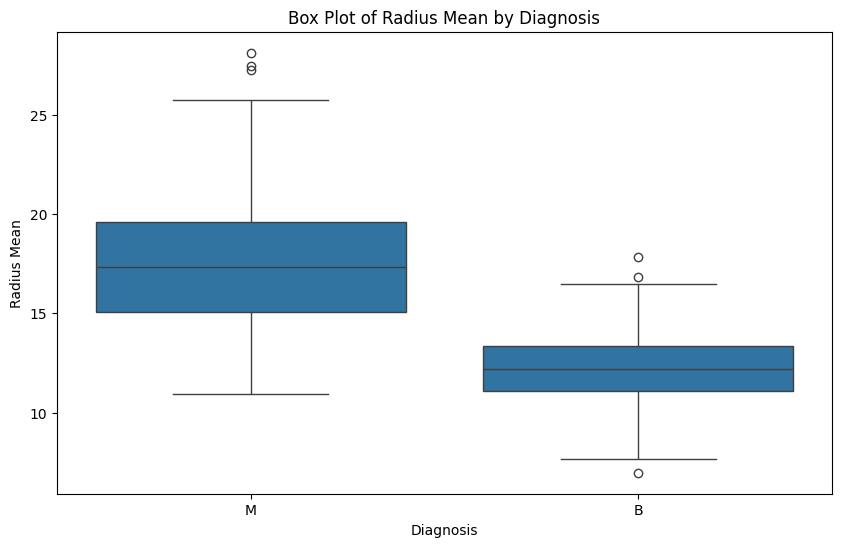

In [ ]:
#6 Box Plot untuk radius_mean berdasarkan diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=dataset)
plt.title('Box Plot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()
#box plot yang memperlihatkan distribusi usia (Age) berdasarkan Outcome (diabetes atau tidak).
#"with Outliers": Menunjukkan bahwa box plot ini akan memperlihatkan nilai-nilai outlier yang terletak di luar whiskers.
#Jika ada titik-titik yang muncul sebagai titik terpisah dari box plot, itu adalah outlier.


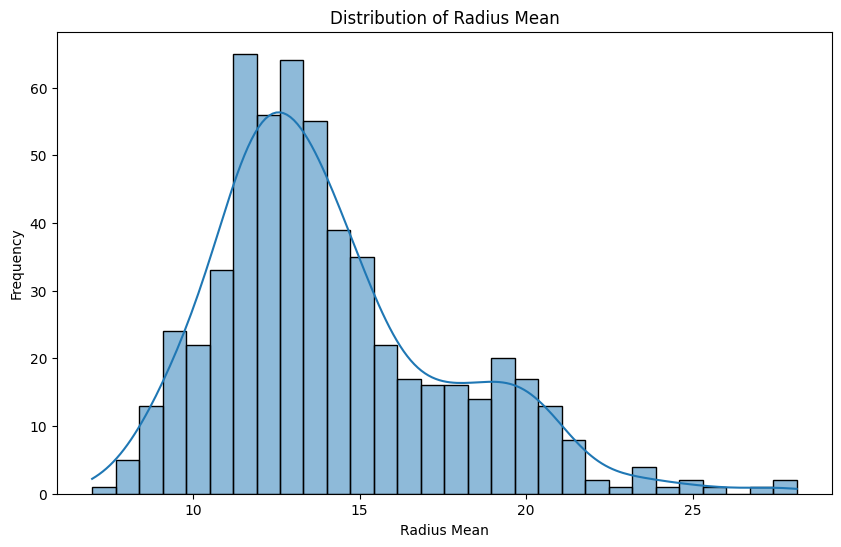

In [ ]:
# 7   Histogram visualisasi untuk radius_mean
plt.figure(figsize=(10, 6))
sns.histplot(dataset['radius_mean'], bins=30, kde=True)
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()
#histogram dengan kurva distribusi yang menggambarkan Distribusi dari Radius Mean.
#Mayoritas objek dalam dataset memiliki radius rata-rata sekitar 13-15.
#Beberapa nilai outlier terlihat di ujung kanan (radius lebih dari 20), namun frekuensinya rendah.


In [ ]:
diagnosis = {'M': 0, 'B': 1}
dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis) #diagnosis dalam dataset digantikan dengan versi numerik menggunakan metode .map()
#mengganti setiap nilai 'M' dengan 0 dan 'B' dengan 1.
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


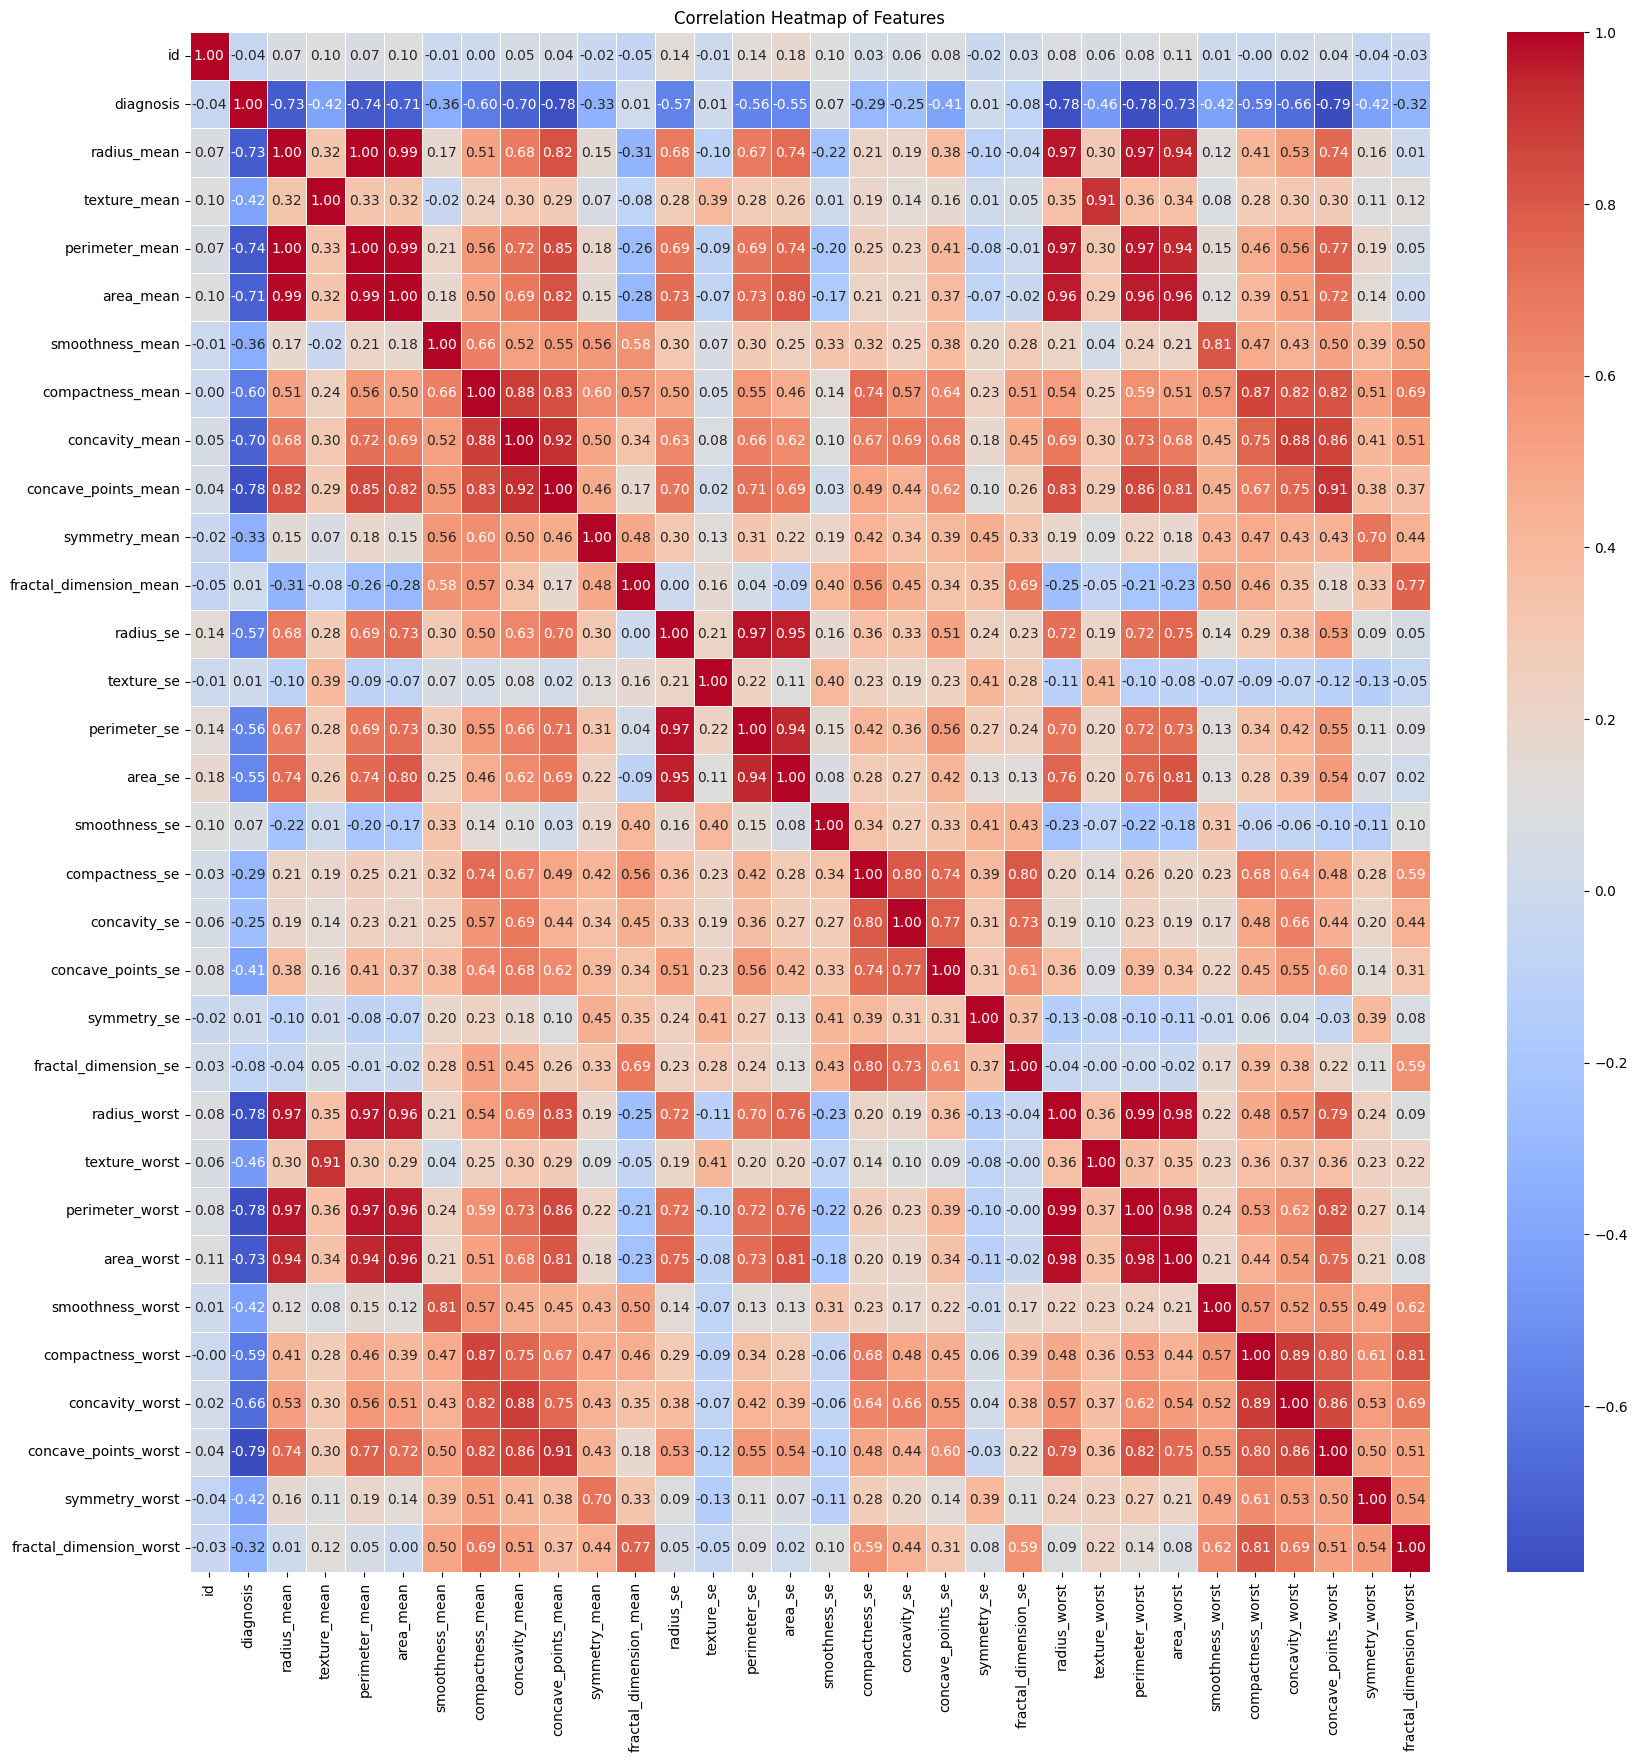

In [ ]:
#heatmap
corr_matrix = dataset.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
#untuk menampilkan nilai unik dari target variabel di dalam dataframe
print(f"Nilai unik untuk Diagnosis:")
print(dataset["diagnosis"].unique())

Nilai unik untuk Diagnosis:
[0 1]


# Machine **Learning**

In [ ]:
#1
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

#memisahkan fitur (variabel independen) dan target (variabel dependen) dalam dataset untuk keperluan analisis atau model machine learning.
#X: DataFrame yang berisi semua kolom kecuali kolom species (dihapus dengan drop()).
#y: Series yang berisi kolom species, yang merupakan target yang ingin diprediksi.

In [ ]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# membagi dataset menjadi dua bagian: data pelatihan (train) dan data pengujian (test) menggunakan fungsi train_test_split dari scikit-learn.
# X: Data fitur (input) yang akan digunakan untuk membuat model.
# y: Target atau label (output) yang akan diprediksi.
# test_size=0.20: Menentukan bahwa 20% dari dataset akan digunakan sebagai data pengujian, sementara 80% akan digunakan untuk pelatihan.
# random_state=42: Menjamin bahwa pembagian data selalu sama setiap kali kode dijalankan (agar hasil bisa direproduksi).

In [ ]:
#3
print(X_train.shape)
print(X_test.shape)

#Mengetahui berapa banyak sampel dan fitur yang ada dalam data pelatihan dan pengujian setelah pembagian dataset, mencetak ukuran (dimensi) dari data fitur hasil pembagian (X_train dan X_test)
#X_train.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pelatihan. Biasanya, ini dalam bentuk (jumlah sampel, jumlah fitur).
#X_test.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pengujian.

(455, 31)
(114, 31)


# **Decision** Tree

# Entropy

In [ ]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

#criterion='entropy': Menggunakan entropy sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, untuk menghindari overfitting.
#random_state=0: Menetapkan seed untuk memastikan bahwa hasil pembagian akan selalu sama setiap kali kode dijalankan (agar bisa direproduksi).
#clf_en.fit = Melatih (fit) model dengan data pelatihan (X_train dan y_train), sehingga model dapat mempelajari hubungan antara fitur (X_train) dan target (y_train).

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
y_pred_en = clf_en.predict(X_test)

#clf_en = untuk prediksi target (label) dari data fitur pengujian X_test.
# y_pred_en = perkiraan nilai target yang sesuai untuk setiap sampel dalam X_test.

In [ ]:
#c
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
#accuracy_score = Menghitung skor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en). Akurasi adalah rasio jumlah prediksi yang benar terhadap total prediksi.
#{0:0.4f}: Format untuk mencetak hasil akurasi dengan 4 angka desimal.

Model accuracy score with criterion entropy index: 0.9649


In [ ]:
#d
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
#clf_en.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang sudah dilatih
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
#clf_en.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumny


Training set score: 0.9802
Test set score: 0.9649


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [16, 266]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [5, 258]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [3, 257]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [153, 20]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994

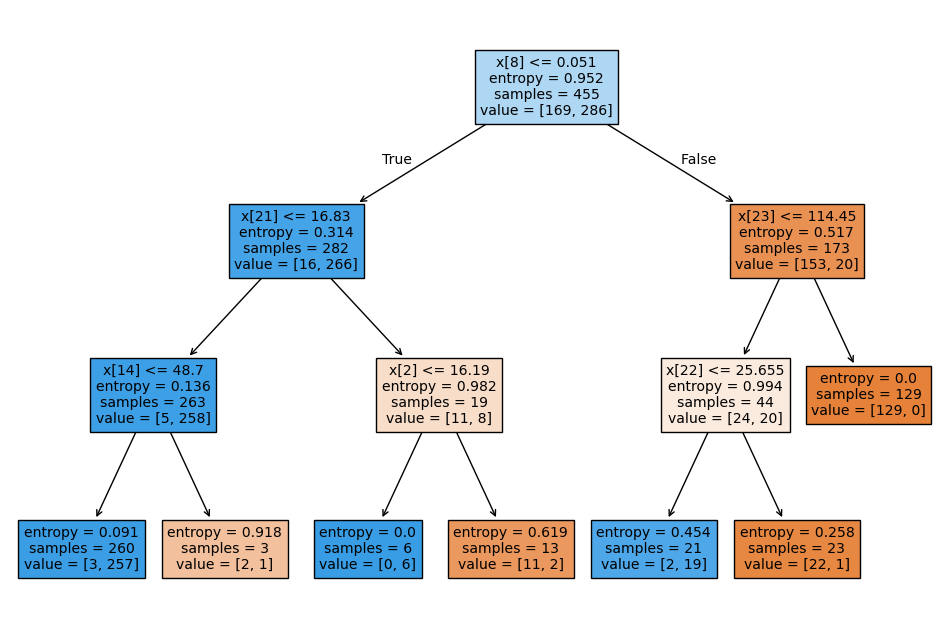

In [ ]:
#e
plt.figure(figsize=(12,8))
# figure (kanvas gambar) dengan ukuran 12x8 inci untuk visualisasi, sehingga lebih besar dan lebih mudah dilihat.

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

#clf_en.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan.
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.
#filled=True: Mengisi setiap node dengan warna yang menunjukkan dominasi kelas di node tersebut, memudahkan interpretasi visual.

# Gini

In [ ]:
#a
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

#criterion='gini': Menggunakan Gini impurity sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, yang dapat mencegah model overfitting.
#random_state=0: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
#clf_gini.fit: Melatih model dengan data pelatihan (X_train, y_train).

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
y_pred_gini = clf_gini.predict(X_test)
#clf_gini.predict(X_test): Menggunakan model clf_gini (yang sudah dilatih) untuk memprediksi label (target) dari data fitur pengujian X_test.
#y_pred_gini: Hasil prediksi dari model, yaitu nilai target yang diperkirakan untuk setiap sampel dalam X_test.

In [ ]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#kor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).
#Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah prediksi.

Model accuracy score with criterion gini index: 0.9474


In [ ]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
#clf_gini.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang telah dilatih.
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))
#clf_gini.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumnya.

Training set score: 0.9780
Test set score: 0.9474


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'x[

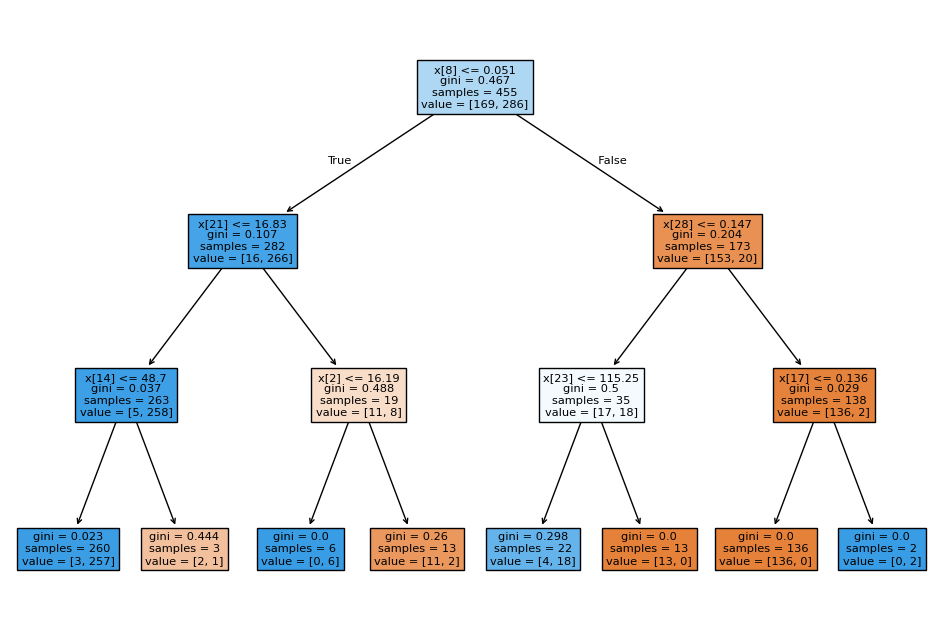

In [ ]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)
#clf_gini.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan (X_train dan y_train).
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.

In [ ]:
#f
#confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_en)
cm_en = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix entropy: \n', cm_gini)
print('Confusion matrix gini index: \n', cm_en)

#confusion_matrix(y_test, y_pred_en): Menghitung confusion matrix untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#confusion_matrix(y_test, y_pred_gini): Menghitung confusion matrix untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).


Confusion matrix entropy: 
 [[39  4]
 [ 0 71]]
Confusion matrix gini index: 
 [[39  4]
 [ 2 69]]


In [ ]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

#classification_report(y_test, y_pred_en): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#classification_report(y_test, y_pred_gini): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini)

Classification Report Entropy
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Model dengan kriteria entropy menunjukkan performa yang lebih baik dibandingkan dengan gini index, dengan akurasi yang lebih tinggi dan tidak ada kesalahan dalam mengklasifikasikan kelas B. Akurasi Model: 0.9649, menunjukkan performa yang sangat baik. Akurasi Model: 0.9474, yang sedikit lebih rendah dibandingkan dengan model entropy.
###Kedua model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data, tetapi model entropy lebih konsisten dalam mengidentifikasi kelas mayoritas tanpa kesalahan.

# Naive Bayes

In [ ]:
#a
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#nb_classifier = GaussianNB(): Membuat instance dari kelas GaussianNB, yang akan digunakan sebagai model klasifikasi.
#nb_classifier.fit(X_train, y_train): Melatih model nb_classifier menggunakan data pelatihan X_train (fitur) dan y_train (label target).
#Model ini belajar dari data pelatihan untuk menentukan hubungan antara fitur dan kelas target.

GaussianNB()

In [ ]:
#b
nb_y_pred = nb_classifier.predict(X_test)
#Naive Bayes yang telah dilatih (nb_classifier) untuk memprediksi label (kelas) dari data pengujian (X_test).
#nb_y_pred: Variabel ini menyimpan hasil prediksi, yang berupa array dari label yang diprediksi untuk setiap contoh dalam X_test.

In [ ]:
#c & d
nb_cm = confusion_matrix(y_test, nb_y_pred)
#confusion matrix menggunakan fungsi confusion_matrix dari scikit-learn, yang membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred). Confusion matrix ini memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.
print("Confusion Matrix:\n", nb_cm)
print('Accuracy Score with GaussianNB: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))
#Akurasi dihitung sebagai proporsi jumlah prediksi yang benar terhadap total jumlah data

Confusion Matrix:
 [[ 0 43]
 [ 1 70]]
Accuracy Score with GaussianNB: 0.6140
Training set score: 0.6286
Test set score: 0.6140


In [ ]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))
#classification_report menghitung dan mencetak laporan klasifikasi. Laporan ini membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred).

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      0.99      0.76        71

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



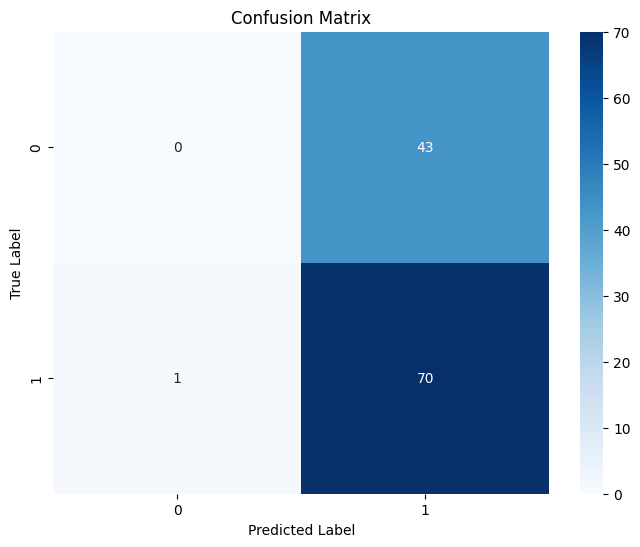

In [ ]:
# heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#cm: Data yang akan dipetakan.
#annot=True: Menampilkan nilai di dalam sel heatmap.
#fmt='d': Mengatur format tampilan angka menjadi desimal (bilangan bulat).
#cmap='Blues': Mengatur palet warna heatmap menjadi variasi biru.

## Akurasi Model: 0.6140, menunjukkan bahwa model memiliki performa yang kurang baik dalam mengklasifikasikan data. Meskipun model berhasil mengklasifikasikan sebagian besar data dari kelas B dengan baik, ketidakmampuannya untuk mendeteksi kelas M membuatnya tidak layak untuk penggunaan praktis dalam konteks ini.

# Gradient Boosting


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)


In [ ]:
# Train the model on the training data
# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:49:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# untuk membuat prediksi menggunakan model Gradient Boosting Classifier yang sudah dilatih sebelumnya
y_pred = model.predict(X_test)

In [ ]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Gradient Boosting: {accuracy:.4f}")

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score Gradient Boosting: {0:0.4f}'.format(model.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score Gradient Boosting: {0:0.4f}'.format(model.score(X_test, y_test)))


Accuracy Gradient Boosting: 0.9561
Training set score Gradient Boosting: 1.0000
Test set score Gradient Boosting: 0.9561


In [ ]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model Gradient Boosting Classifier
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrics Gradient Boosting:")
print(conf_matrix)

Confusion Matrics Gradient Boosting:
[[40  3]
 [ 2 69]]


In [ ]:
# untuk mencetak laporan klasifikasi (classification report) dari model Gradient Boosting Classifier
class_report = classification_report(y_test, y_pred)
print("Classification Report Gradient Boosting:")
print(class_report)

Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Akurasi Model: 0.9561 menunjukkan bahwa akurasi lebih baik daripad gini namun tidak lebih baik daripada entropy

## **kesimpulan**

### Model terbaik untuk digunakan adalah Decision Tree dengan Kriteria Entropy diikuti dengan Gradient Boosting Classifier. Gradient memiliki akurasi sebesar 95.61% pada data uji. Model ini menunjukkan performa yang sangat baik, dengan precision dan recall tinggi pada kedua kelas, yaitu 0 dan 1.
### namun Decision Tree entropy memiliki akurasi lebih tinggi yaitu sebesar 96.49% pada data uji. Precision, recall, dan f1-score untuk kedua kelas mendekati nilai sempurna, menunjukkan bahwa model ini dapat membedakan data dari kedua kelas dengan sangat baik.
### dari ketiga metode dapat dibuktikan jika Decision Tree dengan Kriteria Entropy memiliki Akurasi tertinggi dengan sedikit kesalahan, konsisten dalam mengenali kedua kelas dengan baik.
### Gradient Boosting Classifier - Akurasi yang sangat baik, sedikit kesalahan dalam klasifikasi, namun sedikit di bawah Decision Tree Entropy.
### Decision Tree dengan Kriteria Gini Index - Akurasi sedikit lebih rendah dibandingkan Gradient Boosting, namun masih menunjukkan performa yang kuat dan stabil.
### GaussianNB - Akurasi jauh lebih rendah dan kesulitan mengenali kelas 0, sehingga menjadi pilihan yang paling kurang sesuai untuk dataset ini.
# Model terbaik untuk digunakan adalah Decision Tree dengan Kriteria Entropy diikuti dengan Gradient Boosting Classifier.






